In [5]:
import numpy as np
from scipy import optimize
from sympy import *
from scipy.integrate import odeint
from numpy import linalg as LA
import matplotlib.pyplot as plt


This script describes an analytical approach to understand whether a system in a non-growing field generates spatial periodic heterogeneities (Turing patterns). This approach consists in studying the stability of a steady state and the dispersion relation when diffusion is introduced. If introduction of diffusion turns a stable steady state into an unstable one, this is called a diffusion-driven instability which is the base of Turing patterns. 

An introductory explanation of this method can be found in http://webhome.phy.duke.edu/~hsg/414/files/lectures/linear-stability-notes.pdf

This method consists of various steps.
1. Find steady states
2. Analyse their stability using linear stability analysis
3. Analyse their stability when diffusion is introduced through the dispersion relation


The system used as an example is the klika2021_65.


$$\frac{\partial u}{\partial t} = a-u+u^2v +  D_u \frac{\partial^2 u}{\partial x^2} ,$$

$$\frac{\partial v}{\partial t} = b-u^2v + +  D_v \frac{\partial^2 v}{\partial x^2} $$ 


Original paper: Gorder,Klika,Krause 2021 https://doi.org/10.1007/s00285-021-01552-y


### 1. Find steady states

This method has been explained in the previous notebook found in the OriginalCode/SteadyStates directory. 

The steady states obtained are  [1.1, 0.9091]

In [6]:
a = 0.9
b =1
Ustar = [a+b, b/(a+b)**2] 
print('Steady state')
print(Ustar)

Steady state
[1.9, 0.2770083102493075]


### Function and jacobian definition

In [7]:
#Equations defining the klika2021 system. (eq66)
#params is a vector including the kinetic parameters.

def madz(u,params = [0.9,1]):
    a,b = symbols('a'),symbols('b')
    f_u0 = a - u[0] + (u[0]**2)*u[1]
    f_u1 = b - (u[0]**2)*u[1]
    return f_u0,f_u1
    
# def jacobian_madz():
#     U,V=symbols('U'),symbols('V')
#     functions = Matrix(madz([U,V]))
#     jacobian_matrix = functions.jacobian([U,V])
#     return jacobian_matrix


def jacobian_madz(wvn):
    u = Ustar
    d_A, d_B = [1,10]
    
    Ju0 = [2*u[0]*u[1] - 1 - d_A * wvn ** 2, u[0]**2]
    Ju1 = [-2*u[0]*u[1], -u[0]**2 - d_B * wvn ** 2]
    
    return Ju0, Ju1


### 2. Calculate dispersion relation (with and without diffusion)

In [8]:
def calculate_dispersion(jac,x, top_dispersion,n_species=2):

    # - Define which wavenumbers will be analysed. L = 100 in this case (100mm) (The experimental system is a 10cm plate)
    # so wavelengths bigger than that are of no interest.
    # - In this case we will sample 5000+1 different wavenumbers. If you sample less you might not find your turing instability.
    # If you sample more, is more computationally expensive.

    # wvn_list = np.array(list(range(0,5000+1)))*np.pi/100
    wvn_list = np.array(list(range(0,top_dispersion+1)))*np.pi/100
    count = 0
    eigenvalues = np.zeros((len(wvn_list),n_species) ,dtype=np.complex_)
    
    for wvn in wvn_list:
#         jac = jac(wvn) #obtain jacobian for corresponding system. This time with a determined wvn.
        eigenval, eigenvec = LA.eig(jac(wvn)) #calculate the eigenvalues of the jacobian with diffusion
        # sort eigenvalues so the one with the instability is at position -1.
        idx = np.argsort(eigenval) #np.argsort
        eigenval= eigenval[idx] #orders eigenvalues for each k.
        eigenvalues[count]  = eigenval
        count +=1

    return eigenvalues


Red zone (Turing)

(-0.849917756976974+0j)


10.471975511965978

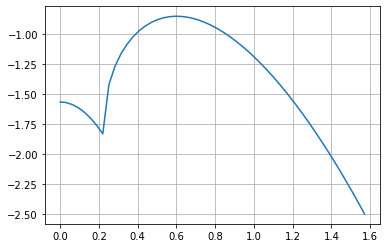

In [10]:
a = 0.8
b =1
Ustar = [a+b, b/(a+b)**2] 
top_dispersion = 50
eigenvalues = calculate_dispersion(jacobian_madz, Ustar, top_dispersion)
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, eigenvalues[:,1])
plt.grid()
print(np.amax(eigenvalues))
wavelenght = 2*np.pi/0.6
wavelenght

Green zone (r=0.08)

[1.4, 0.5102040816326532]
(-0.48228921662232427+0j)


10.471975511965978

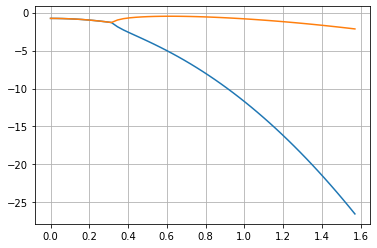

In [11]:
a = 0.4
b =1
Ustar = [a+b, b/(a+b)**2]
print(Ustar)
top_dispersion = 50
eigenvalues = calculate_dispersion(jacobian_madz, Ustar, top_dispersion)
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, eigenvalues)
plt.grid()
print(np.amax(eigenvalues))
wavelenght = 2*np.pi/0.6
wavelenght

Blue zone (r=0.16)

(-1.1080765669080872+0j)


10.471975511965978

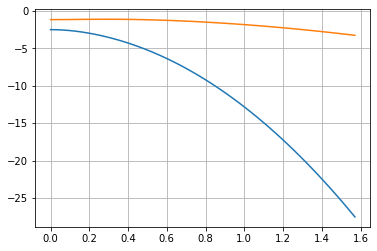

In [20]:
a = 1.5
b =0.2
Ustar = [a+b, b/(a+b)**2] 
top_dispersion = 50
eigenvalues = calculate_dispersion(jacobian_madz, Ustar, top_dispersion)
plt.plot( np.array(list(range(0,top_dispersion+1)))*np.pi/100, eigenvalues)
plt.grid()
print(np.amax(eigenvalues))
wavelenght = 2*np.pi/0.6
wavelenght